In [ ]:
pip install ipykernel

In [ ]:
pip install pandas

In [ ]:
pip install numpy


In [ ]:
pip install sklearn


In [ ]:
pip install matplotlib


In [ ]:
pip install seaborn


In [ ]:
pip install lightgbm


In [ ]:
pip install xgboost


In [ ]:
pip install --upgrade pip


In [ ]:
pip install catboost-dev[widget]==1.2rc0

In [14]:
#import packages and libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error

In [15]:
data=pd.read_csv('C:\Users\91876\Desktop\CARPRICEPREDICTOR\model\car.csv')
data.head()

,Car_Name,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Selling_Price
0,ritz,2014,5.59,27000,Petrol,Dealer,Manual,0,3.35
1,sx4,2013,9.54,43000,Diesel,Dealer,Manual,0,4.75
2,ciaz,2017,9.85,6900,Petrol,Dealer,Manual,0,7.25
3,wagon r,2011,4.15,5200,Petrol,Dealer,Manual,0,2.85
4,swift,2014,6.87,42450,Diesel,Dealer,Manual,0,4.60


In [16]:
data.shape

(301, 9)

In [17]:
data.columns

Index(['Car_Name', 'Year', 'Present_Price', 'Kms_Driven', 'Fuel_Type',
       'Seller_Type', 'Transmission', 'Owner', 'Selling_Price'],
      dtype='object')

In [18]:
data.isnull().sum()

Car_Name         0
Year             0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
Selling_Price    0
dtype: int64

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Present_Price  301 non-null    float64
 3   Kms_Driven     301 non-null    int64  
 4   Fuel_Type      301 non-null    object 
 5   Seller_Type    301 non-null    object 
 6   Transmission   301 non-null    object 
 7   Owner          301 non-null    int64  
 8   Selling_Price  301 non-null    float64
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [20]:
print(data.describe())

              Year  Present_Price     Kms_Driven       Owner  Selling_Price
count   301.000000     301.000000     301.000000  301.000000     301.000000
mean   2013.627907       7.628472   36947.205980    0.043189       4.661296
std       2.891554       8.644115   38886.883882    0.247915       5.082812
min    2003.000000       0.320000     500.000000    0.000000       0.100000
25%    2012.000000       1.200000   15000.000000    0.000000       0.900000
50%    2014.000000       6.400000   32000.000000    0.000000       3.600000
75%    2016.000000       9.900000   48767.000000    0.000000       6.000000
max    2018.000000      92.600000  500000.000000    3.000000      35.000000


In [ ]:
# le=LabelEncoder()
# df['Fuel_Type']=le.fit_transform(data.Fuel_Type.values)
# df['Transmission']=le.fit_transform(data.Transmission.values)
# df.head()

In [25]:
df= data.drop((['Car_Name','Seller_Type']),axis=1)
le=LabelEncoder()
df['Fuel_Type']=le.fit_transform(data.Fuel_Type.values)
df['Transmission']=le.fit_transform(data.Transmission.values)
print(df.head())
df.corr()

   Year  Present_Price  Kms_Driven  Fuel_Type  Transmission  Owner   
0  2014           5.59       27000          2             1      0  \
1  2013           9.54       43000          1             1      0   
2  2017           9.85        6900          2             1      0   
3  2011           4.15        5200          2             1      0   
4  2014           6.87       42450          1             1      0   

   Selling_Price  
0           3.35  
1           4.75  
2           7.25  
3           2.85  
4           4.60  


,Year,Present_Price,Kms_Driven,Fuel_Type,Transmission,Owner,Selling_Price
Year,1.000000,-0.047584,-0.524342,-0.053643,0.000394,-0.182104,0.236141
Present_Price,-0.047584,1.000000,0.203647,-0.440415,-0.348715,0.008057,0.878983
Kms_Driven,-0.524342,0.203647,1.000000,-0.166801,-0.162510,0.089216,0.029187
Fuel_Type,-0.053643,-0.440415,-0.166801,1.000000,0.080466,0.055705,-0.509467
Transmission,0.000394,-0.348715,-0.162510,0.080466,1.000000,-0.050316,-0.367128
Owner,-0.182104,0.008057,0.089216,0.055705,-0.050316,1.000000,-0.088344
Selling_Price,0.236141,0.878983,0.029187,-0.509467,-0.367128,-0.088344,1.000000


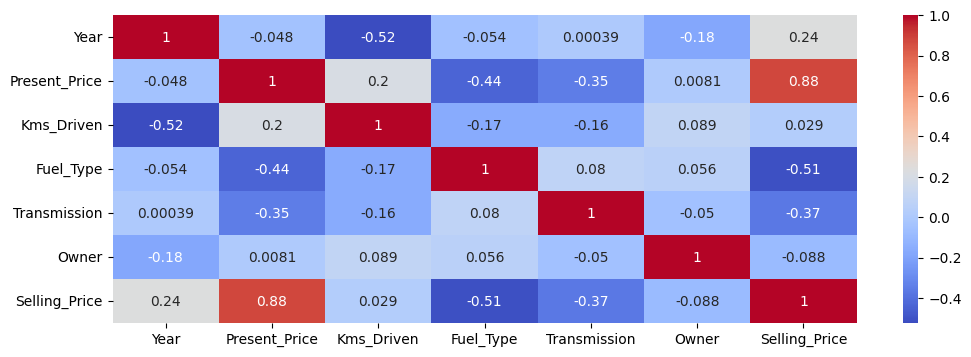

In [26]:
plt.figure(figsize=(12,4))
correlations=df.corr()
sns.heatmap(correlations,cmap='coolwarm',annot=True)
plt.show()

In [27]:
#2=petrol 1=diesel 0=cng
df.Fuel_Type.unique()

array([2, 1, 0])

In [29]:
#1=manual 0=automatic
df.Transmission.unique()

array([1, 0])

In [30]:
#0=first 1=second 2=third 3=fourth
df.Owner.unique()

array([0, 1, 3], dtype=int64)

In [31]:
#target column is selling price
predict=df['Selling_Price']
data=df[['Year','Present_Price','Kms_Driven','Fuel_Type','Transmission','Owner']]

In [32]:
X=np.array(data)
y=np.array(predict)

In [33]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [34]:
# Train all 7 models on X_train and y_train
lrmodel=LinearRegression().fit(X_train,y_train)
dt_model=DecisionTreeRegressor().fit(X_train,y_train)
rf_model=RandomForestRegressor().fit(X_train,y_train)
gbm_model=GradientBoostingRegressor().fit(X_train,y_train)
lgbm_model=LGBMRegressor().fit(X_train,y_train)
xgb_model=XGBRegressor().fit(X_train,y_train)
catb_model=CatBoostRegressor().fit(X_train,y_train)

Learning rate set to 0.032678
0:	learn: 5.0584466	total: 149ms	remaining: 2m 29s
1:	learn: 4.9688545	total: 150ms	remaining: 1m 14s
2:	learn: 4.8711424	total: 151ms	remaining: 50.2s
3:	learn: 4.7888311	total: 152ms	remaining: 37.9s
4:	learn: 4.7190478	total: 153ms	remaining: 30.4s
5:	learn: 4.6458892	total: 154ms	remaining: 25.5s
6:	learn: 4.5648051	total: 155ms	remaining: 22s
7:	learn: 4.4810206	total: 155ms	remaining: 19.3s
8:	learn: 4.4086698	total: 156ms	remaining: 17.2s
9:	learn: 4.3366972	total: 157ms	remaining: 15.5s
10:	learn: 4.2817505	total: 158ms	remaining: 14.2s
11:	learn: 4.1949923	total: 159ms	remaining: 13.1s
12:	learn: 4.1111847	total: 160ms	remaining: 12.1s
13:	learn: 4.0371321	total: 160ms	remaining: 11.3s
14:	learn: 3.9661335	total: 161ms	remaining: 10.6s
15:	learn: 3.9116167	total: 162ms	remaining: 9.94s
16:	learn: 3.8454501	total: 162ms	remaining: 9.37s
17:	learn: 3.7812806	total: 163ms	remaining: 8.89s
18:	learn: 3.7335332	total: 164ms	remaining: 8.45s
19:	learn: 

In [35]:
def evaluate_model(model,X_test,y_test):
    prediction=model.predict(X_test)
    print('Mean Absolute Error:',mean_absolute_error(y_test,prediction))
    print('Mean absolute percentage error:',mean_absolute_percentage_error(y_test,prediction))
    print('Mean Squared Error:',mean_squared_error(y_test,prediction))
    print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,prediction)))
    print('R2 Score:',r2_score(y_test,prediction))

In [36]:
print('LR_Model:')
print(evaluate_model(lrmodel,X_test,y_test))
print()
print('DT_Model:')
print(evaluate_model(dt_model,X_test,y_test))
print()
print('RF_Model:')
print(evaluate_model(rf_model,X_test,y_test))
print()
print('GBM_Model:')
print(evaluate_model(gbm_model,X_test,y_test))
print()
print('LGBM_Model:')
print(evaluate_model(lgbm_model,X_test,y_test))
print()
print('XGB_Model:')
print(evaluate_model(xgb_model,X_test,y_test))
print()
print('CatBoost_Model:')
print(evaluate_model(catb_model,X_test,y_test))
print()


LR_Model:
Mean Absolute Error: 1.297281718482121
Mean absolute percentage error: 0.9605630077833969
Mean Squared Error: 3.552007299443616
Root Mean Squared Error: 1.8846769748271495
R2 Score: 0.8458034656635289
None

DT_Model:
Mean Absolute Error: 0.7927868852459015
Mean absolute percentage error: 0.19087284740196683
Mean Squared Error: 1.4537540983606558
Root Mean Squared Error: 1.2057172547329063
R2 Score: 0.9368909394471776
None

RF_Model:
Mean Absolute Error: 0.6133885245901641
Mean absolute percentage error: 0.16503376046514262
Mean Squared Error: 0.8740442208196723
Root Mean Squared Error: 0.9349033216432981
R2 Score: 0.9620567813224017
None

GBM_Model:
Mean Absolute Error: 0.5215257711648354
Mean absolute percentage error: 0.1633779896468599
Mean Squared Error: 0.6352570369055928
Root Mean Squared Error: 0.7970301355065521
R2 Score: 0.9724227949872057
None

LGBM_Model:
Mean Absolute Error: 0.9335822170092835
Mean absolute percentage error: 0.2935297426592877
Mean Squared Error: 

In [42]:
predictions = catb_model.predict(X_test)
predictions

array([ 0.62411168, 11.05179227,  4.98750273,  0.33953006,  8.07084554,
        5.93432443,  1.16138242,  0.46278608,  0.33205617,  6.31598633,
        8.39694358,  0.8844188 ,  8.34588389,  0.49162868,  5.40705392,
        2.71507164,  0.97498342, 12.32829967,  0.43899686,  1.58085473,
        0.2541806 ,  9.04238529,  5.42293089,  2.78955531,  0.48040761,
        3.10614521,  5.24965381,  2.59145929,  1.28787185,  1.17499464,
        0.49408696, 10.11569164,  0.31152261,  2.27932264,  7.87989142,
        4.37812584,  6.53656046,  4.42440991,  2.64770458,  5.81967686,
        3.08638672,  2.69027079,  4.69944974,  0.45018814,  6.77235177,
        0.65681325,  7.76039517,  6.61017753,  2.84247831,  3.6367342 ,
        5.90132558,  1.25566097, 21.29099273, 22.52108043,  6.32813551,
       10.86339268,  4.52305766,  9.39712833,  2.23572133,  7.1602799 ,
        0.24391004])

In [43]:
#lets do the prediction on new unknown data
input=[[2016,6.87,30000,1,1,0]]
price=catb_model.predict(input)
print(price.round(3)[0],'lakhs')

6.093 lakhs


In [46]:
#save the model in pickle file
import pickle
pickle.dump(catb_model,open('car_price_predictor_model.pkl','wb'))

In [47]:
print(catb_model)